## **Modelos de Segmentação**


**O objetivo deste notebook é demonstrar a aplicação de modelos de segmentação para geração de anotação de imagens, dado que já temos modelos de detecção de objetos.**

- Serão demonstrados diferentes cenários onde temos uma simples detecção, múltiplas detecções e também para uma imagem como um todo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Instalando dependências**

In [ ]:
%%capture
!pip install ultralytics
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

## **Download das imagens e pesos dos modelos**

In [ ]:
%%capture
# Pesos
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
%%capture
# Imagens Teste
!wget -P images 'https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg'
!wget -P images 'https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg'
!wget -P images 'https://wricidades.org/sites/default/files/tr%C3%AAs.jpg'
!wget -P images 'https://wricidades.org/sites/default/files/naldo.jpg'

In [ ]:
%%capture
# Frutas
!wget -P images 'https://s2-g1.glbimg.com/hWMKfZrVwHIPJJMgslhvGEuRKGw=/0x0:1920x1080/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2018/i/S/DJzZRhQWyub4r7FnBZrA/nc-maca-safra-181118.jpg'
!wget -P images 'https://blog4.mfrural.com.br/wp-content/uploads/2020/06/plantar-banana.jpg' # Banana
!wget -P images 'https://ocontadordecervejas.com.br/wp-content/uploads/thumbnails/quanto-tempo-leva-para-um-pe-de-uva-dar-frutos.jpg' # Uva
!wget -P images 'https://imagens-revista.vivadecora.com.br/uploads/2021/08/Aprenda-dicas-e-truques-de-como-plantar-abacaxi-em-casa.-Foto-MF-Magazine-MF-Rural.jpg'

## **Bibliotecas utilizadas**

In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2
import sys
import torch
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt

## **Funções utilizadas**

In [ ]:
def yolov8_detection(model, img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img, save=True)  # generator of Results objects
    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
    bbox=boxes.xyxy.tolist()[0]
    return bbox, img

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
image_path = '/content/images/plantar-banana.jpg'
model_path = '/content/drive/MyDrive/TCC/Pesos/Yolov8/yolov8l/weights/best.pt'
model=YOLO(model_path)
yolov8_boxex, image = yolov8_detection(model, image_path)

In [ ]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda:0" #cpu

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

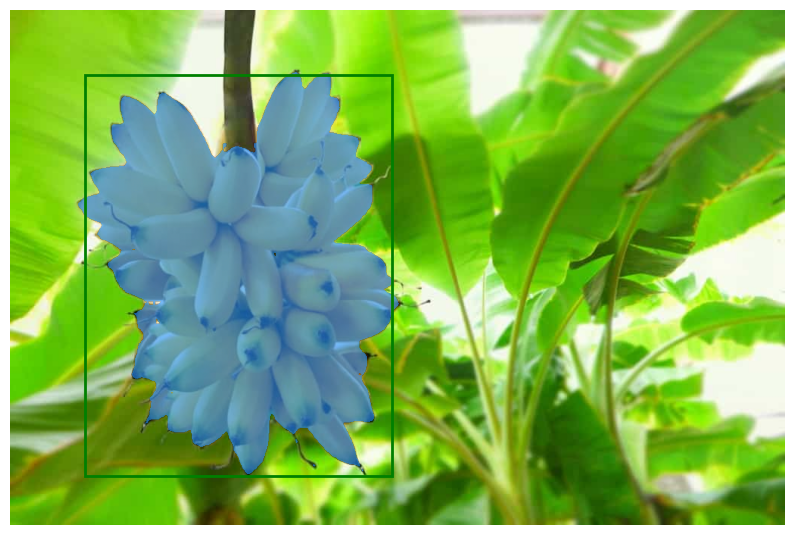

Bounding box: [90, 83, 424, 531]
Segmentation mask: [376, 83, 375, 84, 373, 84, 371, 86, 370, 86, 368, 88, 367, 88, 366, 89, 365, 89, 364, 90, 363, 90, 353, 100, 353, 101, 351, 103, 351, 104, 350, 105, 350, 106, 349, 107, 349, 108, 347, 110, 347, 111, 346, 112, 346, 113, 345, 114, 345, 116, 344, 117, 344, 118, 343, 119, 343, 120, 342, 121, 342, 122, 341, 123, 341, 124, 340, 125, 340, 126, 339, 127, 339, 128, 338, 129, 338, 131, 337, 132, 337, 133, 336, 134, 336, 136, 335, 137, 335, 139, 334, 140, 334, 142, 333, 143, 333, 144, 332, 145, 332, 146, 331, 147, 331, 148, 330, 149, 330, 150, 329, 151, 329, 152, 328, 153, 328, 155, 327, 156, 327, 160, 326, 161, 326, 175, 324, 177, 322, 177, 322, 182, 324, 184, 324, 187, 322, 189, 321, 189, 320, 188, 317, 188, 315, 186, 314, 186, 312, 184, 311, 184, 310, 183, 307, 183, 306, 182, 303, 182, 302, 181, 297, 181, 296, 182, 294, 182, 293, 183, 292, 183, 289, 186, 288, 186, 286, 188, 283, 188, 281, 186, 281, 185, 282, 184, 282, 183, 284, 181, 285, 181

In [ ]:
predictor = SamPredictor(sam)
predictor.set_image(image)

input_box = np.array(yolov8_boxex)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

for i, mask in enumerate(masks):
    # Convert the mask to a binary image
    #binary_mask = mask.cpu().numpy().squeeze().astype(np.uint8)
    binary_mask = torch.from_numpy(masks).squeeze().numpy().astype(np.uint8)
    # Find the contours of the mask
    contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Get the largest contour based on area
    largest_contour = max(contours, key=cv2.contourArea)
    # Get the new bounding box
    bbox = [int(x) for x in cv2.boundingRect(largest_contour)]
    # Get the segmentation mask for object
    segmentation = largest_contour.flatten().tolist()
    # Write bounding boxes to file in YOLO format
    with open('bounding_boxe_NEW_137.txt', 'w') as f:
        for contour in contours:
            # Get the bounding box coordinates of the contour
            x, y, w, h = cv2.boundingRect(contour)
            # Convert the coordinates to YOLO format and write to file
            f.write('0 {:.6f} {:.6f} {:.6f} {:.6f}\n'.format((x+w/2)/image.shape[1], (y+h/2)/image.shape[0], w/image.shape[1], h/image.shape[0]))
    mask=segmentation
    # load the image
    #width, height = image_path.size
    img = Image.open(image_path)
    width, height = img.size
    # convert mask to numpy array of shape (N,2)
    mask = np.array(mask).reshape(-1,2)
    # normalize the pixel coordinates
    mask_norm = mask / np.array([width, height])
    # compute the bounding box
    xmin, ymin = mask_norm.min(axis=0)
    xmax, ymax = mask_norm.max(axis=0)
    bbox_norm = np.array([xmin, ymin, xmax, ymax])
    # concatenate bbox and mask to obtain YOLO format
    yolo = np.concatenate([bbox_norm, mask_norm.reshape(-1)])
    # write the yolo values to a text file
    with open('yolo_maskformat.txt', 'w') as f:
        for val in yolo:
            f.write("{:.6f} ".format(val))
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    show_mask(masks[0], plt.gca())
    show_box(input_box, plt.gca())
    plt.axis('off')
    plt.show()
    # Print the bounding box and segmentation mask
    print("Bounding box:", bbox)
    print("Segmentation mask:", segmentation)

## **Multi object detection**

In [ ]:
def yolov8_detection(model, img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img, save=True)  # generator of Results objects
    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
    bbox = boxes.xyxy.tolist()
    bbox = [[int(i) for i in box] for box in bbox]
    return bbox, iag

In [ ]:
image = '/content/images/quanto-tempo-leva-para-um-pe-de-uva-dar-frutos.jpg'
yolov8_boxex, image = yolov8_detection(model, image)


0: 448x640 6 Grapes, 52.4ms
Speed: 4.3ms preprocess, 52.4ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [ ]:
def inference(image, sam):
    predictor = SamPredictor(sam)
    predictor.set_image(image)
    input_boxes = torch.tensor(yolov8_boxex, device=predictor.device)

    transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, image.shape[:2])

    masks, _, _ = predictor.predict_torch(
        point_coords=None,
        point_labels=None,
        boxes=transformed_boxes,
        multimask_output=False,
    )

    for i, mask in enumerate(masks):
        #binary_mask = masks[i].squeeze().numpy().astype(np.uint8)
        binary_mask = masks[i].squeeze().cpu().numpy().astype(np.uint8)
        # Find the contours of the mask
        contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        # Get the new bounding box
        bbox = [int(x) for x in cv2.boundingRect(largest_contour)]
        # Get the segmentation mask for object
        segmentation = largest_contour.flatten().tolist()
        # Write bounding boxes to file in YOLO format
        with open('BBOX_yolo.txt', 'w') as f:
            for contour in contours:
                # Get the bounding box coordinates of the contour
                x, y, w, h = cv2.boundingRect(contour)
                # Convert the coordinates to YOLO format and write to file
                f.write('0 {:.6f} {:.6f} {:.6f} {:.6f}\n'.format((x+w/2)/image.shape[1], (y+h/2)/image.shape[0], w/image.shape[1], h/image.shape[0]))
                f.write('\n')
        mask=segmentation
        # load the image
        #width, height = image_path.size
        img = Image.open(image_path)
        width, height = img.size
        # convert mask to numpy array of shape (N,2)
        mask = np.array(mask).reshape(-1,2)
        # normalize the pixel coordinates
        mask_norm = mask / np.array([width, height])
        # compute the bounding box
        xmin, ymin = mask_norm.min(axis=0)
        xmax, ymax = mask_norm.max(axis=0)
        bbox_norm = np.array([xmin, ymin, xmax, ymax])
        # concatenate bbox and mask to obtain YOLO format
        yolo = np.concatenate([bbox_norm, mask_norm.reshape(-1)])
        # compute the bounding box
        # write the yolo values to a text file
        with open('yolomask_format.txt', 'w') as f:
            for val in yolo:
                f.write("{:.6f} ".format(val))
            f.write('\n')
        # Print the bounding box and segmentation mask
        print("Bounding box:", bbox)
        #print("Segmentation mask:", segmentation)
        print("yolo",yolo)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for mask in masks:
        show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)
    for box in input_boxes:
        show_box(box.cpu().numpy(), plt.gca())
    plt.axis('off')
    plt.show()

Bounding box: [1888, 170, 244, 1138]
yolo [     1.8438     0.24963      2.0811 ...      0.2511      2.0566     0.24963]
Bounding box: [988, 205, 256, 575]
yolo [    0.96484     0.30103      1.2139 ...      0.3025      1.1445     0.30103]
Bounding box: [0, 0, 802, 1097]
yolo [          0           0     0.78223 ...   0.0044053     0.33887           0]
Bounding box: [165, 401, 208, 695]
yolo [    0.16113     0.58884     0.36328 ...     0.59031     0.19043     0.58884]
Bounding box: [0, 398, 380, 698]
yolo [          0     0.58443     0.37012 ...     0.58737     0.19238     0.58443]
Bounding box: [418, 300, 385, 595]
yolo [     0.4082     0.44053      0.7832 ...       0.442     0.66504     0.44053]


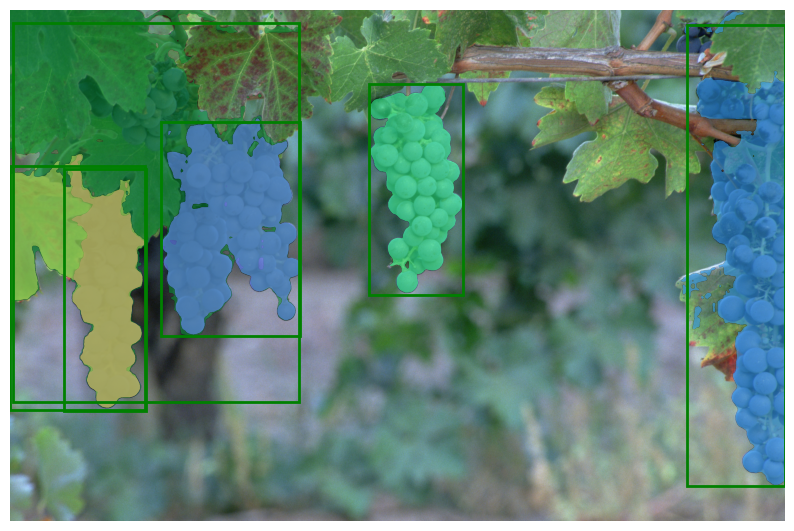

In [ ]:
inference(image, sam)

In [ ]:
image = '/content/images/nc-maca-safra-181118.jpg'
yolov8_boxex, image = yolov8_detection(model, image)


0: 384x640 1 Grape, 228.9ms
Speed: 3.3ms preprocess, 228.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Bounding box: [0, 0, 984, 552]
yolo [          0           0     0.95996 ...   0.0014684    0.017578           0]


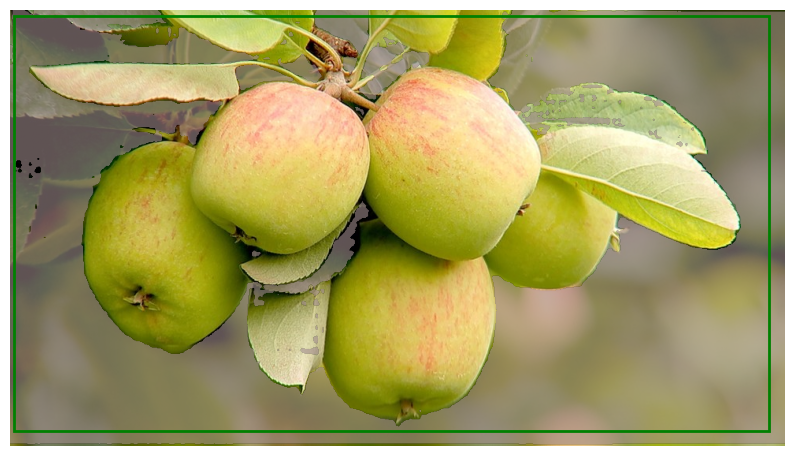

In [ ]:
inference(image, sam)

In [ ]:
image = '/content/images/Aprenda-dicas-e-truques-de-como-plantar-abacaxi-em-casa.-Foto-MF-Magazine-MF-Rural.jpg'
yolov8_boxex, image = yolov8_detection(model, image)


0: 416x640 1 Pineapple, 329.7ms
Speed: 4.2ms preprocess, 329.7ms inference, 9.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


Bounding box: [155, 0, 452, 687]
yolo [    0.15137           0      0.5918 ...   0.0014684      0.5918           0]


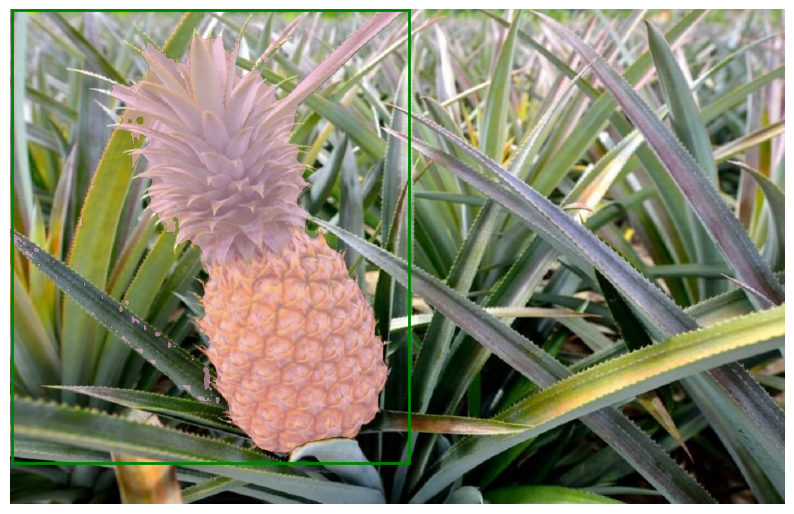

In [ ]:
inference(image, sam)